In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import os


In [2]:
# Load saved scores and computation times
score = np.load('./results_test/score_20_steps_SS.npy')
time = np.load('./results_test/computation_time_20_steps_SS.npy')

# Extract individual scores
cnn_cnn_score = score[0]
cnn_lstm_score = score[1]
lstm_cnn_score = score[2]
lstm_lstm_score = score[3]

# Extract computation times
cnn_cnn_time = time[0]
cnn_lstm_time = time[1]
lstm_cnn_time = time[2]
lstm_lstm_time = time[3]


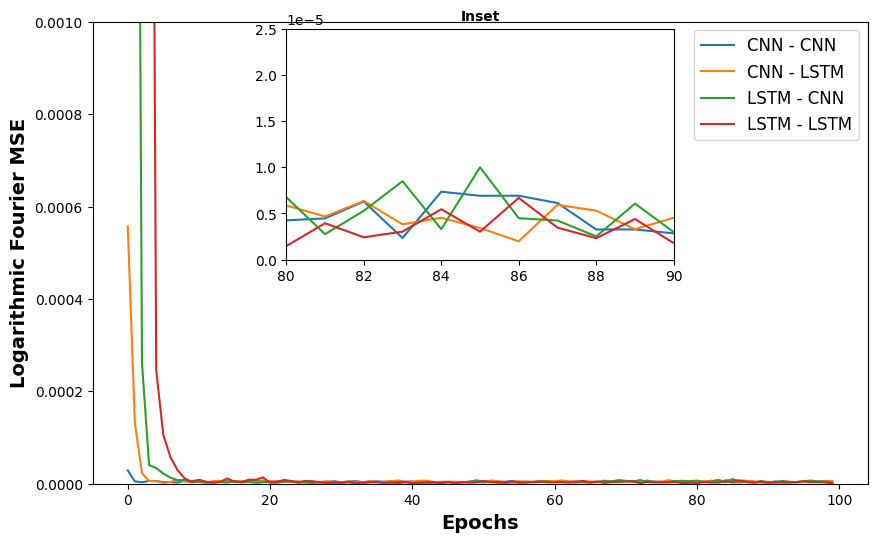

In [3]:
# Plotting the scores with an inset inside the frame
fig, ax_main = plt.subplots(figsize=(10, 6))

# Main plot
ax_main.plot(cnn_cnn_score, label="CNN - CNN")
ax_main.plot(cnn_lstm_score, label="CNN - LSTM")
ax_main.plot(lstm_cnn_score, label="LSTM - CNN")
ax_main.plot(lstm_lstm_score, label="LSTM - LSTM")
ax_main.legend(fontsize=12)
ax_main.set_ylim(0, 0.001)
ax_main.set_xlabel('Epochs', fontweight='bold', fontsize=14)
ax_main.set_ylabel('Logarithmic Fourier MSE', fontweight='bold', fontsize=14)

# Inset plot
ax_inset = inset_axes(ax_main, width="50%", height="50%", loc='upper center')
ax_inset.plot(cnn_cnn_score)
ax_inset.plot(cnn_lstm_score)
ax_inset.plot(lstm_cnn_score)
ax_inset.plot(lstm_lstm_score)
ax_inset.set_xlim(80, 90)
ax_inset.set_ylim(0, 0.000025)
ax_inset.set_title('Inset', fontweight='bold', fontsize=10)

# Save the figure in PDF format
plt.savefig('score_plot_allModel_with_inset.pdf', format='pdf', bbox_inches='tight')

# Show the plot
plt.show()


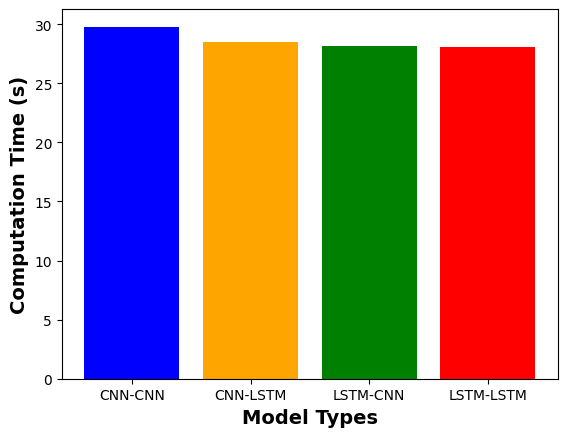

In [4]:
# Define the color dictionary
dicolour = {
    'blue': 'blue',
    'orange': 'orange',
    'green': 'green',
    'red': 'red'
}

# Create the bar plot
plt.bar(
    x=['CNN-CNN', 'CNN-LSTM', 'LSTM-CNN', 'LSTM-LSTM'],
    height=[cnn_cnn_time, cnn_lstm_time, lstm_cnn_time, lstm_lstm_time],
    color=[dicolour['blue'], dicolour['orange'], dicolour['green'], dicolour['red']]
)

# Add labels
plt.xlabel('Model Types', fontweight='bold', fontsize=14)
plt.ylabel('Computation Time (s)', fontweight='bold', fontsize=14)

# Save the figure in PDF format
plt.savefig('computation_time_plot.pdf', format='pdf', bbox_inches='tight')

# Show the plot
plt.show()
